## Imports

In [1]:
!pip install matplotlib
!pip install scipy
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

## Reading/Cleaning Data

In [3]:
gpu_data = pd.read_csv("gpu_specs_v6.csv")

In [4]:
print(gpu_data)
# Printing data set 

     manufacturer       productName  releaseYear  memSize  memBusWidth  \
0          NVIDIA  GeForce RTX 4050       2023.0    8.000        128.0   
1           Intel         Arc A350M       2022.0    4.000         64.0   
2           Intel         Arc A370M       2022.0    4.000         64.0   
3           Intel          Arc A380       2022.0    4.000         64.0   
4           Intel         Arc A550M       2022.0    8.000        128.0   
...           ...               ...          ...      ...          ...   
2884         3dfx  Voodoo5 5000 AGP          NaN    0.016        128.0   
2885         3dfx  Voodoo5 5000 PCI          NaN    0.016        128.0   
2886         3dfx      Voodoo5 6000          NaN    0.032        128.0   
2887        Intel            Xe DG1          NaN    4.000        128.0   
2888        Intel        Xe DG1-SDV          NaN    8.000        128.0   

      gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader  \
0         1925    2250.0       

In [5]:
gpu_data.head()
# First 5 rows

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [6]:
gpu_data.tail()
# last 5 rows

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
2884,3dfx,Voodoo5 5000 AGP,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2885,3dfx,Voodoo5 5000 PCI,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,PCI,SDR,VSA-100
2886,3dfx,Voodoo5 6000,NaN,0.032,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2887,Intel,Xe DG1,NaN,4.000,128.0,900,2133.0,640.0,40,20,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1
2888,Intel,Xe DG1-SDV,NaN,8.000,128.0,900,2133.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1


In [7]:
print(gpu_data.columns)
# names of each column

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'pixelShader',
       'vertexShader', 'igp', 'bus', 'memType', 'gpuChip'],
      dtype='object')


In [8]:
gpu_data = gpu_data.drop("pixelShader", axis=1)
gpu_data = gpu_data.drop("vertexShader", axis=1)
# Removing pixel and vertex shader columns. Not enough data to be useful

In [9]:
print(gpu_data.columns)
# repriting column names

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'igp', 'bus',
       'memType', 'gpuChip'],
      dtype='object')


In [10]:
gpu_data.info()
# the amount of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   releaseYear    2845 non-null   float64
 3   memSize        2477 non-null   float64
 4   memBusWidth    2477 non-null   float64
 5   gpuClock       2889 non-null   int64  
 6   memClock       2477 non-null   float64
 7   unifiedShader  2065 non-null   float64
 8   tmu            2889 non-null   int64  
 9   rop            2889 non-null   int64  
 10  igp            2889 non-null   object 
 11  bus            2889 non-null   object 
 12  memType        2889 non-null   object 
 13  gpuChip        2889 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 316.1+ KB


In [11]:
gpu_data.dropna(inplace=True)
# droping rows of data that have blank sets of data

In [12]:
gpu_data.info()
# reprinting amounts of data

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 2340
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   1721 non-null   object 
 1   productName    1721 non-null   object 
 2   releaseYear    1721 non-null   float64
 3   memSize        1721 non-null   float64
 4   memBusWidth    1721 non-null   float64
 5   gpuClock       1721 non-null   int64  
 6   memClock       1721 non-null   float64
 7   unifiedShader  1721 non-null   float64
 8   tmu            1721 non-null   int64  
 9   rop            1721 non-null   int64  
 10  igp            1721 non-null   object 
 11  bus            1721 non-null   object 
 12  memType        1721 non-null   object 
 13  gpuChip        1721 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 201.7+ KB


## Statistical Summary: Min's, Max's, Averages, etc. 

In [13]:
gpu_data.describe()
# Shows the counts, means, standard deviations, min, max, and the 1st, 2nd, and 3rd quartiles of each numerical column of data.

,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,2013.571761,4.345259,322.584544,861.147008,1102.266124,1170.514817,71.453806,27.373620
std,4.130951,8.273479,761.177359,325.848376,407.848886,1769.078898,84.930007,28.780896
min,2005.000000,0.128000,32.000000,300.000000,266.000000,8.000000,4.000000,0.000000
25%,2010.000000,1.024000,128.000000,620.000000,800.000000,160.000000,20.000000,8.000000
50%,2013.000000,2.000000,128.000000,796.000000,1000.000000,480.000000,40.000000,16.000000
75%,2017.000000,4.000000,256.000000,1005.000000,1375.000000,1536.000000,96.000000,32.000000
max,2023.000000,128.000000,8192.000000,2331.000000,2257.000000,17408.000000,880.000000,256.000000


In [14]:
# Describes the catagorical columns of data
gpu_data.describe(include="object")

,manufacturer,productName,igp,bus,memType,gpuChip
count,1721,1721,1721,1721,1721,1721
unique,4,1592,1,21,15,203
top,NVIDIA,GeForce GT 555M,No,PCIe 2.0 x16,GDDR5,GK104
freq,904,5,1721,539,712,51


## Correlations / Relationships Between Numerical/Continuous Data Types

### Year released vs memory clock speeds

In [15]:
releaseyear = gpu_data.releaseYear
memclock = gpu_data.memClock
# defining values

In [16]:
corr = scipy.stats.pearsonr(releaseyear, memclock)
print("correlation coefficient: ", corr[0])

# correlation score
# Score is close to 1 which means they are correlated

correlation coefficient:  0.7413629519593259


In [17]:
linear_model = scipy.stats.linregress(releaseyear, memclock)
print(linear_model)

# creting  a linear model

LinregressResult(slope=np.float64(73.19477243992519), intercept=np.float64(-146280.66068454494), rvalue=np.float64(0.7413629519593258), pvalue=np.float64(4.6349159141252484e-300), stderr=np.float64(1.5980901140399122), intercept_stderr=np.float64(3217.8758923932487))


In [18]:
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*releaseyear+y_intercept

# creating the slope, y intercept, and linear fit of the model

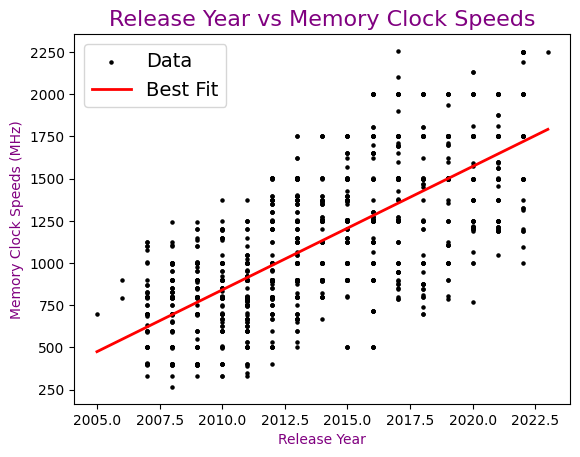

In [ ]:
plt.scatter(releaseyear, memclock, s=5, color="black", label="Data")
plt.plot(releaseyear, linear_fit, linewidth=2, color="red", linestyle="-", label="Best Fit")
plt.xlabel("Release Year", color="purple")
plt.ylabel("Memory Clock Speeds (MHz)", color="purple")
plt.title("Release Year vs Memory Clock Speeds", color="purple", fontsize=16)
plt.legend(fontsize=14, loc="upper left")
plt.show()

# creating a scatter plot of release year and memory clock with regression line

In [20]:
year_mem_pt = pd.pivot_table(gpu_data, values="memClock", index=["releaseYear"], aggfunc="mean")
print(year_mem_pt)

# creating a pivot table of memory clock and release year

                memClock
releaseYear             
2005.0        700.000000
2006.0        846.000000
2007.0        655.481481
2008.0        740.270073
2009.0        756.060606
2010.0        828.075188
2011.0        825.353333
2012.0        971.183673
2013.0       1100.741758
2014.0       1106.210084
2015.0       1178.222222
2016.0       1301.548387
2017.0       1429.050505
2018.0       1429.300000
2019.0       1527.345679
2020.0       1548.970588
2021.0       1590.554054
2022.0       1753.979592
2023.0       2250.000000


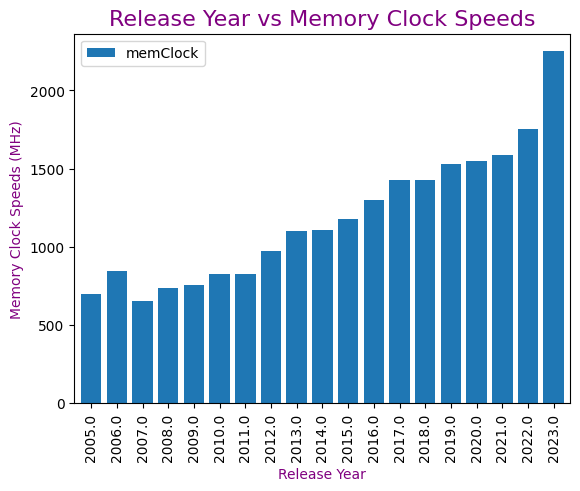

In [64]:
year_mem_pt.plot(kind="bar", width=.8)
plt.xlabel("Release Year", color="purple")
plt.ylabel("Memory Clock Speeds (MHz)", color="purple")
plt.title("Release Year vs Memory Clock Speeds", color="purple", fontsize=16)
plt.show()

# creating a bar graph of the year mem pivot table

### Memory Size vs Memory Type

In [22]:
msize_type_pt = pd.pivot_table(gpu_data, values="memSize", index=["memType"], aggfunc="mean")
print(msize_type_pt)

# Creating a pivot table of memory size and memory type. 

           memSize
memType           
DDR2      0.456170
DDR3      1.528257
DDR4      4.000000
GDDR3     0.798247
GDDR4     0.794000
GDDR5     3.500817
GDDR5X   11.437500
GDDR6    10.152632
GDDR6X   15.692308
HBM       4.000000
HBM2     17.381818
HBM2e    57.142857
HBM3     80.000000
LPDDR4X   6.000000
LPDDR5   16.000000


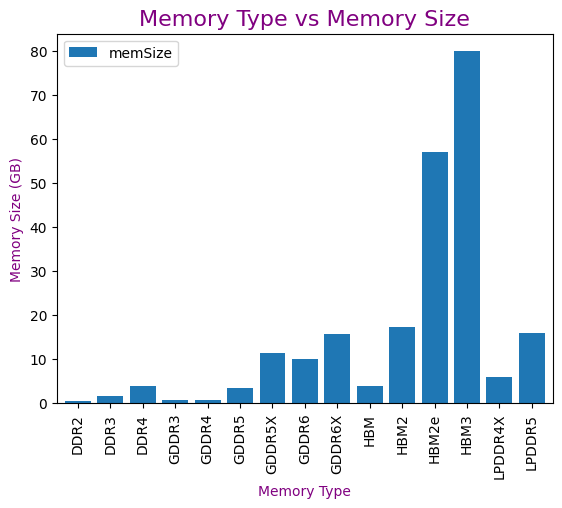

In [23]:
msize_type_pt.plot(kind="bar", width=0.8)
plt.xlabel("Memory Type", color="purple")
plt.ylabel("Memory Size (GB)", color="purple")
plt.title("Memory Type vs Memory Size", color="purple", fontsize=16)
plt.show()

# Creating a bar graph of memory size and type pivot table. 

### Spearmanr Correlation Between TMU and ROP

In [24]:
print(gpu_data.columns)

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'igp', 'bus',
       'memType', 'gpuChip'],
      dtype='object')


In [25]:
tmu = gpu_data.tmu
rop = gpu_data.rop

In [26]:
spear = scipy.stats.spearmanr(tmu, rop)
print(spear.statistic)

0.9244151272466183


The spearmanr correlation shows the monotonic relationship betweem the two sets of data. The correlation between tmu and rop is 0.923315, which shows a positive correlation between the two. This means that as tmu increases, rop also increases. 

In [27]:
linear_model = scipy.stats.linregress(tmu, rop)
print(linear_model)

slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*tmu+y_intercept

# Creating linear model & fit, slope, and y_intercept

LinregressResult(slope=np.float64(0.2874743854292482), intercept=np.float64(6.832481042995052), rvalue=np.float64(0.848312770295507), pvalue=np.float64(0.0), stderr=np.float64(0.004327802694903628), intercept_stderr=np.float64(0.48026056283770213))


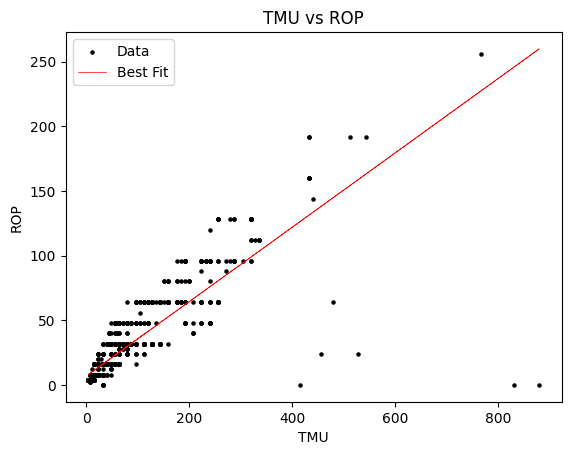

In [28]:
plt.scatter(tmu, rop, s=5, color="black", label="Data")
plt.plot(tmu, linear_fit, linewidth=0.5, color="red", linestyle="-", label="Best Fit")
plt.xlabel("TMU")
plt.ylabel("ROP")
plt.title("TMU vs ROP")
plt.legend()
plt.show()

# Plotting scatter plot of tmu vs rop with regression line

## Correlatioin / Relationships Between Catagorical Data Types

### Bus vs Manufacturer

In [29]:
bus_manufacturer = pd.crosstab(gpu_data["bus"], gpu_data["manufacturer"])
print(bus_manufacturer)

# Creates a contingency table of bus and manufacturer

manufacturer  AMD  ATI  Intel  NVIDIA
bus                                  
AGP 8x          0   10      0       0
IGP            18    5      0       2
MXM             0    0      0       4
MXM-A (3.0)    30    6      0      32
MXM-B (3.0)    34    2      0      61
MXM-HE          0    0      0      10
MXM-I           0    0      0       4
MXM-II          5   14      0      16
MXM-IV          0    0      0       1
PCI             1    5      0       6
PCIe 1.0 x16    0   22      0      40
PCIe 2.0 x1     1    4      0       3
PCIe 2.0 x16  111  130      1     297
PCIe 2.0 x8     0    0      0      11
PCIe 3.0 x16  193    0      7     289
PCIe 3.0 x4     0    0      0      18
PCIe 3.0 x8   139    0      0      32
PCIe 4.0 x16   37    0      8      61
PCIe 4.0 x4     5    0      0       4
PCIe 4.0 x8    22    0      4      11
PCIe 5.0 x16    3    0      0       2


In [30]:
c, p, dof, expected = scipy.stats.chi2_contingency(bus_manufacturer)
print("p-value:", p)

# Very low p-value shows a significant relationship between bus and manufacturer

p-value: 3.5269852567116446e-110


### Manufacturer vs Product Name

In [31]:
manufacturer_name = pd.crosstab(gpu_data["productName"], gpu_data["manufacturer"])
print(manufacturer_name)

# Creates a contingency table of product name and manufacturer

manufacturer            AMD  ATI  Intel  NVIDIA
productName                                    
A10 PCIe                  0    0      0       1
A100 PCIe                 0    0      0       1
A100 PCIe 80 GB           0    0      0       1
A100 SXM4 40 GB           0    0      0       1
A100 SXM4 80 GB           0    0      0       1
...                     ...  ...    ...     ...
Xeon Phi 5120D            0    0      1       0
Xeon Phi 7120P            0    0      1       0
Xeon Phi 7120X            0    0      1       0
Xeon Phi SE10X            0    0      1       0
Zhongshan Subor Z+ GPU    1    0      0       0

[1592 rows x 4 columns]


In [32]:
c, p, dof, expected = scipy.stats.chi2_contingency(manufacturer_name)
print("p-value:", p)

# Very low p-value shows a significant correlation between manufacturer and product names 
# (Which ism't very surprising, almost like copyright is a thing)

p-value: 4.9174978869027787e-05


## Machine Learning Algorithms

### K Means

In [33]:
from sklearn.cluster import KMeans
# Importing kmeans

In [34]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(gpu_data[["gpuClock", "memClock"]])
kmeans.labels_

# Creating the clusters for k means. 
# Original amount was 2 cluster, after using elbow plot changed it to 9

array([1, 0, 0, ..., 5, 5, 5], dtype=int32)

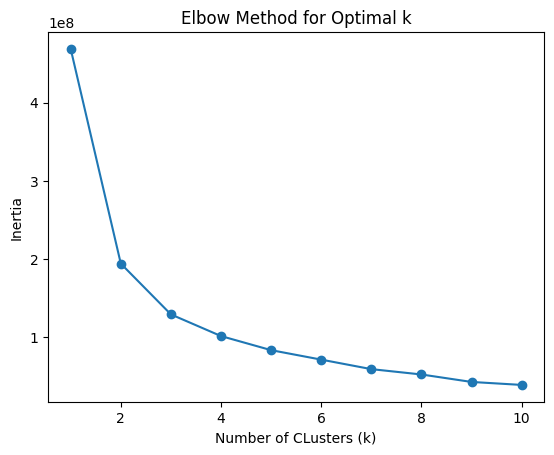

In [35]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gpu_data[["gpuClock", "memClock"]])         # > Creatiung an elbow plot using a for loop to determine the adaquete amount of clusters
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of CLusters (k)")
plt.ylabel("Inertia")                            # > Plotting the elbow plow
plt.title("Elbow Method for Optimal k")
plt.show()

# Elbow plot shows that 9 cluster is the adaquete amount of clusters. 

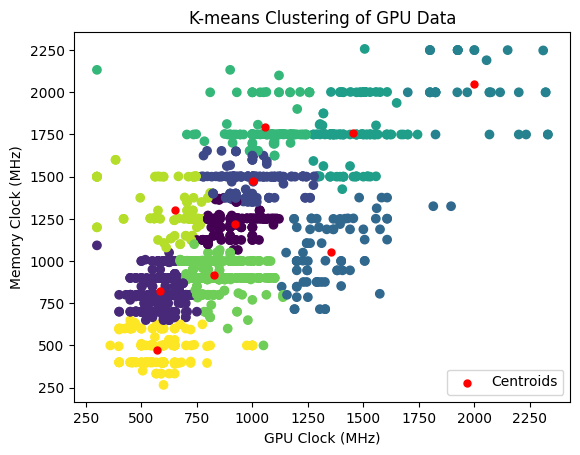

In [36]:

plt.scatter(gpu_data["gpuClock"], gpu_data["memClock"], c=kmeans.labels_, cmap="viridis") 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=25, c="red", label="Centroids") 
plt.xlabel("GPU Clock (MHz)") 
plt.ylabel("Memory Clock (MHz)") 
plt.title("K-means Clustering of GPU Data") 
plt.legend(fontsize=10, loc="lower right") 
plt.show()

# Creating the scatter plot that shows where each cluster is located based on gpu and memoru clock speeds. 
# The red dots are centroids, which is the center of each cluster of data 

In [37]:
gpu_data["Cluster"] = kmeans.labels_
cluster_summary = gpu_data.groupby("Cluster").agg({
     "gpuClock": ["mean", "median", "std"], 
     "memClock": ["mean", "median", "std"]
}).reset_index()

# Creating a summary for each cluster, showing their means, medians, and standard deviations

In [38]:
print(cluster_summary)
# printing the cluster summary

  Cluster     gpuClock                         memClock                    
                  mean  median         std         mean  median         std
0       0   919.836158   924.0   91.130346  1219.485876  1250.0   61.587531
1       1   586.209195   600.0   70.013362   819.894253   800.0   88.281091
2       2  1004.314607  1000.0  117.947091  1475.443820  1500.0   70.550056
3       3  1352.973684  1319.5  154.541384  1052.263158  1002.0  186.163037
4       4  1999.666667  1946.5  187.637188  2046.888889  2000.0  175.739707
5       5  1453.168224  1465.0  106.976411  1760.644860  1750.0  170.871476
6       6  1058.200000  1090.0  141.165574  1792.895238  1750.0  116.787193
7       7   829.370262   800.0  109.493704   919.516035   900.0   82.330238
8       8   650.436364   719.0  136.469207  1303.654545  1250.0  130.790359
9       9   571.545455   564.0  120.466527   472.525974   500.0   85.923526


## Research Questions

### Cleaning Data Again

In [39]:
gpu_data = gpu_data.drop("Cluster", axis=1)
gpu_data
# Dropping the cluster column made eaerlier as to not  make mistakes in data that is analyzed further

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.000,128.0,1925,2250.0,3840.0,120,48,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.000,64.0,300,1500.0,768.0,48,24,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.000,128.0,300,1500.0,2048.0,128,64,No,PCIe 4.0 x16,GDDR6,DG2-512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,NVIDIA,Tesla S870,2007.0,1.536,384.0,600,800.0,128.0,32,24,No,PCIe 1.0 x16,GDDR3,G80
2114,ATI,Xbox 360 GPU 80nm,2007.0,0.512,128.0,500,700.0,240.0,16,8,No,IGP,GDDR3,Xenos Falcon
2157,NVIDIA,GeForce 8800 GTS 640,2006.0,0.640,320.0,513,792.0,96.0,24,20,No,PCIe 1.0 x16,GDDR3,G80
2158,NVIDIA,GeForce 8800 GTX,2006.0,0.768,384.0,576,900.0,128.0,32,24,No,PCIe 1.0 x16,GDDR3,G80


### 1. How have GPU specs changed over time?

In [40]:
year_by_gpuclock = gpu_data.groupby(by="releaseYear")["gpuClock"].mean()
year_by_memclock = gpu_data.groupby(by="releaseYear")["memClock"].mean()
year_by_memsize = gpu_data.groupby(by="releaseYear")["memSize"].mean()
year_by_membuswidth = gpu_data.groupby(by="releaseYear")["memBusWidth"].mean()

# Grouping  the mean gpuclock, memclock, memsize, and membuswidth by the year. 

In [41]:
# print(year_by_gpuclock)
# print(year_by_membuswidth)
# print(year_by_memclock)
print(year_by_memsize)

# Just checkung the groupby function, and calculating percentage incerases by hand. 

releaseYear
2005.0     0.512000
2006.0     0.704000
2007.0     0.510025
2008.0     0.722336
2009.0     0.788040
2010.0     1.098045
2011.0     1.532000
2012.0     1.873578
2013.0     2.640967
2014.0     3.057479
2015.0     3.580622
2016.0     6.119054
2017.0     6.070949
2018.0    11.100000
2019.0     7.441358
2020.0    12.426471
2021.0    16.270270
2022.0    13.714286
2023.0     8.000000
Name: memSize, dtype: float64


GPU clock speeds had a 285% increase from 2005-2023. Memory bus width had a 0% increase from 2005-2023, but had a 262.5% increase from 2005-2022. Memory Clock sppeds had a 
221.43% increase from 2005-2023. Memory Size had a 1,462.5% increase from 2005-2023

#### All on one graph

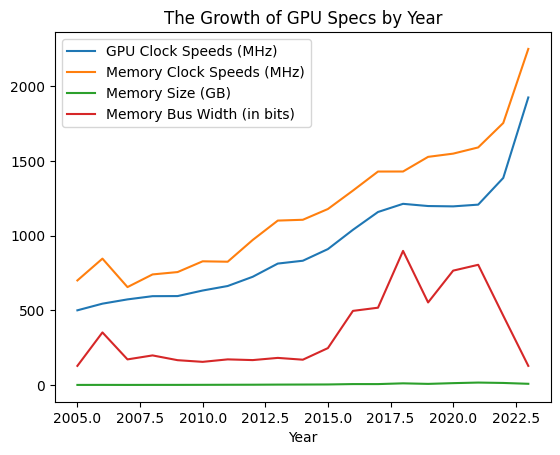

In [42]:
plt.plot(year_by_gpuclock, label="GPU Clock Speeds (MHz)")
plt.plot(year_by_memclock, label="Memory Clock Speeds (MHz)")
plt.plot(year_by_memsize, label="Memory Size (GB)")
plt.plot(year_by_membuswidth, label="Memory Bus Width (in bits)")
plt.legend()
plt.xlabel("Year")
plt.title("The Growth of GPU Specs by Year")
plt.show()

#### GPU clock individually

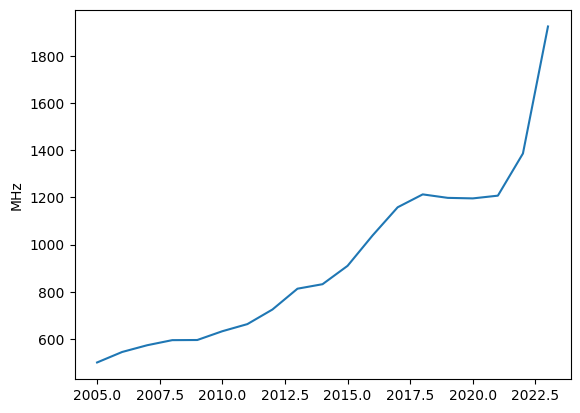

In [43]:
plt.plot(year_by_gpuclock)
plt.ylabel("MHz")
plt.show()

#### Memory size individually

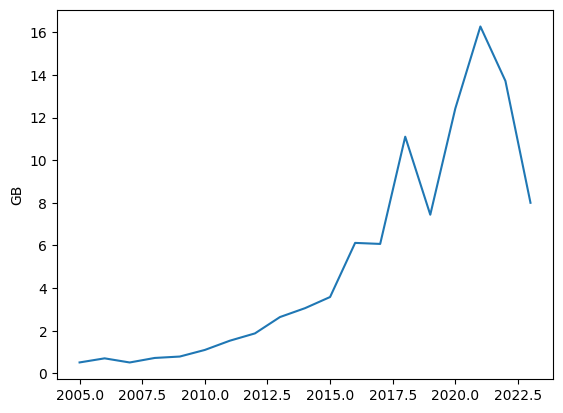

In [44]:
plt.plot(year_by_memsize)
plt.ylabel("GB")
plt.show()

#### Memory Clock Speeds Individually

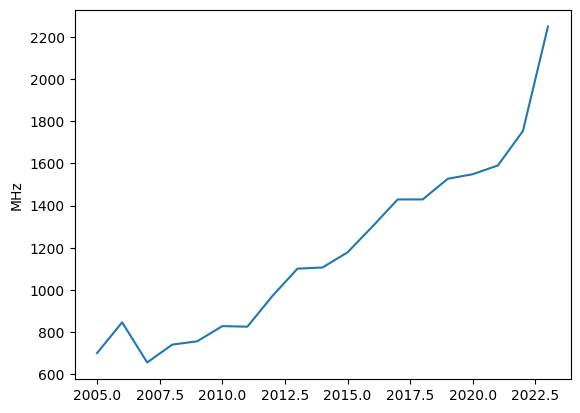

In [45]:
plt.plot(year_by_memclock)
plt.ylabel('MHz')
plt.show()

#### Memory Bus Width Individually

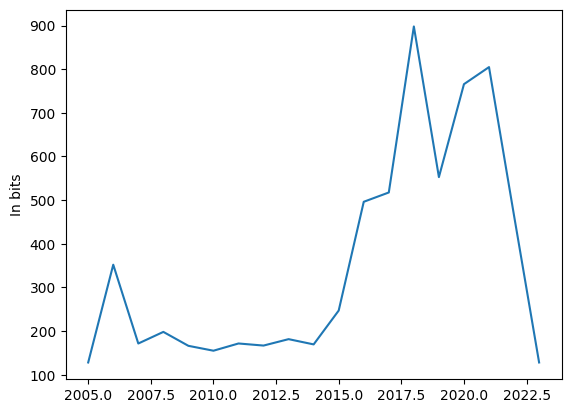

In [46]:
plt.plot(year_by_membuswidth)
plt.ylabel("In bits")
plt.show()

### 2. How has TMU and ROP changed overtime?

In [47]:
from scipy.stats import ks_2samp

In [48]:
# 2-sample Kolmogorov-Smirnov Test of tmu and rop
statistic, p_value = ks_2samp(tmu, rop)
print("KS Statistic:", statistic)
print("p-value:", p_value)

KS Statistic: 0.3387565368971528
p-value: 6.850663929737349e-88


The low ks statisitc implies that tmu and rop are a good match, and that there is little distribution between the two. This can also be seen with the relatively low p-value, which also implies that they are correlated to each other. 

In [49]:
year_by_tmu = gpu_data.groupby(by="releaseYear")["tmu"].mean()
year_by_rop = gpu_data.groupby(by="releaseYear")["rop"].mean()
# Grouping tmu and rop by release year

In [50]:
# print(year_by_tmu)
print(year_by_rop)
# Just checking the groupby

releaseYear
2005.0     8.000000
2006.0    22.000000
2007.0     9.135802
2008.0    12.145985
2009.0    11.313131
2010.0    13.894737
2011.0    17.826667
2012.0    16.340136
2013.0    19.252747
2014.0    20.974790
2015.0    26.044444
2016.0    33.526882
2017.0    35.959596
2018.0    53.942857
2019.0    44.148148
2020.0    64.352941
2021.0    65.189189
2022.0    77.877551
2023.0    48.000000
Name: rop, dtype: float64


Text(0.5, 1.0, 'TMU and ROP Growth by Year')

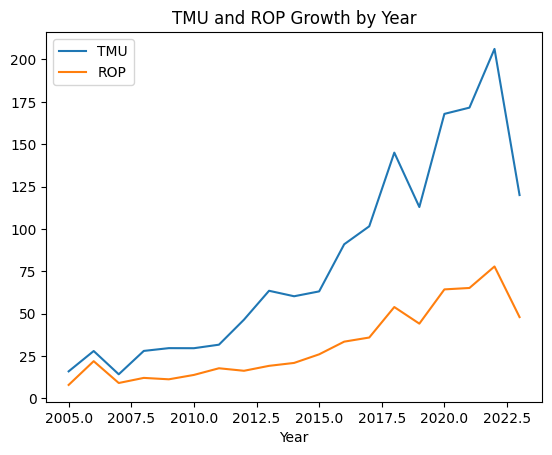

In [51]:
plt.plot(year_by_tmu, label="TMU")
plt.plot(year_by_rop, label="ROP")
plt.xlabel("Year")
plt.legend()
plt.title("TMU and ROP Growth by Year")
# plotting year_by_tmu and year_by_rop onto one graph

### 3. Do certain companies produce better specs than other companies?

In [52]:
print(gpu_data.columns)

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'igp', 'bus',
       'memType', 'gpuChip'],
      dtype='object')


In [53]:
manu_memsize = pd.pivot_table(gpu_data, values="memSize", index=["manufacturer"], aggfunc="mean")
print(manu_memsize)
# creating a pivot table of memory size and manufacturer

                memSize
manufacturer           
AMD            4.667352
ATI            0.689293
Intel         10.200000
NVIDIA         4.803060


In [54]:
manu_membuswidth = pd.pivot_table(gpu_data, values="memBusWidth", index=["manufacturer"], aggfunc="mean")
print(manu_membuswidth)
# creating a pivot table of memory bus width and manufacturer

              memBusWidth
manufacturer             
AMD            353.762938
ATI            143.838384
Intel          851.200000
NVIDIA         329.380531


In [55]:
manu_gpuclock = pd.pivot_table(gpu_data, values="gpuClock", index=["manufacturer"], aggfunc="mean")
print(manu_gpuclock)
# creating a pivot table of gpu clock speeds and manufacturer

                gpuClock
manufacturer            
AMD           946.263773
ATI           643.797980
Intel         714.100000
NVIDIA        855.606195


In [56]:
manu_memclock = pd.pivot_table(gpu_data, values="memClock", index=["manufacturer"], aggfunc="mean")
print(manu_memclock)
# creating a pivot table of memory clock speeds and manufacturer

                 memClock
manufacturer             
AMD           1199.909850
ATI            739.979798
Intel         1426.700000
NVIDIA        1109.738938


<Axes: xlabel='manufacturer'>

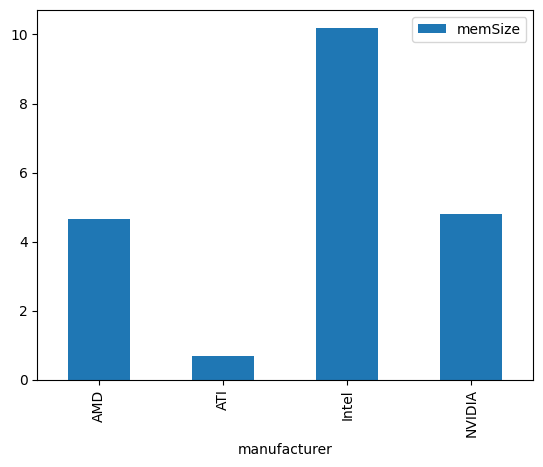

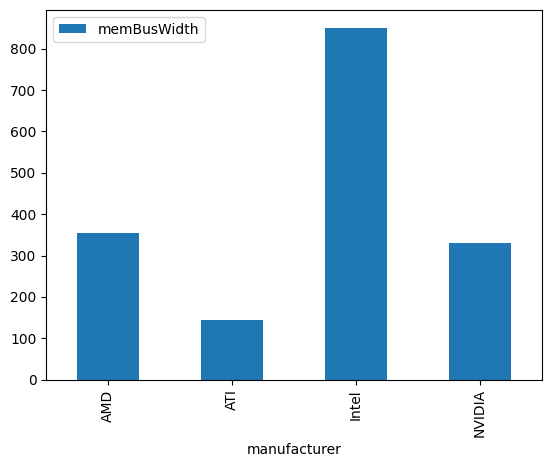

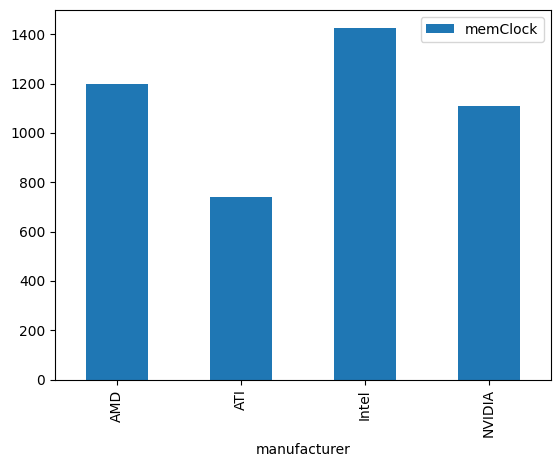

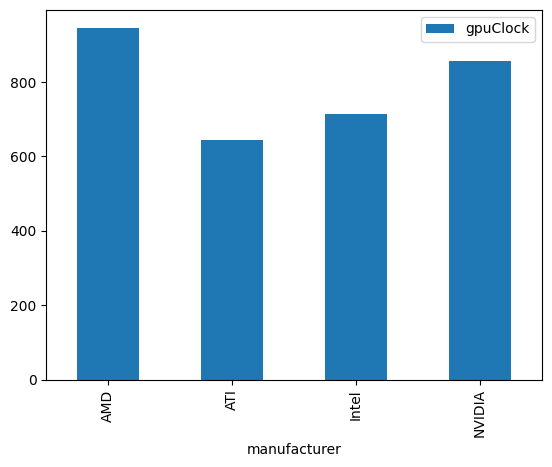

In [57]:
manu_memsize.plot(kind="bar", y="memSize") # Creates Pie Chart
manu_membuswidth.plot(kind="bar", y="memBusWidth")
manu_memclock.plot(kind="bar", y="memClock")
manu_gpuclock.plot(kind="bar", y="gpuClock")